In [54]:
%matplotlib inline
import cgs as cgs
import numpy as np
import matplotlib.pyplot as plt
from dark_matter_ic import dm_density_profiles as dmd
from dark_matter_ic import df
from dark_matter_ic import particle_distribution as pd

In [55]:
8.35579428022e+12 - 8.35579428022e+12

0.0

In [56]:
NFW = dmd.general_dm_profile("Hernquist")
NFW.set_params(profile_shape_params=[1.0,4.0,1.0])

# assuming h = 0.7
h = 0.7
c = 15.0

NFW.set_params(M_vir = 1.0E10 /h * cgs.Msun)
NFW.set_params(r_s   = 2.94 / h * cgs.kpc)
NFW.set_params(r_vir = NFW.r_s * c)
#NFW.set_params(r_decay = 0.1 * NFW.r_vir)

################################
opt_NFW = dmd.general_dm_profile("Hernquist Optimized", optimize = True)
opt_NFW.set_params(profile_shape_params=[1.0,4.0,1.0])

# assuming h = 0.7
h = 0.7
c = 15.0

opt_NFW.set_params(M_vir = 1.0E10 /h * cgs.Msun)
opt_NFW.set_params(r_s   = 2.94 / h * cgs.kpc)
opt_NFW.set_params(r_vir = NFW.r_s * c)
#NFW.set_params(r_decay = 0.1 * NFW.r_vir)

m_sys large r 4.39988948835e+25 3.23278945995e+43
[Profile] :  Optimize set to True. Interpolating along cumulative mass. Check results
m_sys large r 4.39988948835e+25 3.23278945995e+43
[Profile] :  Completed mass tabulation


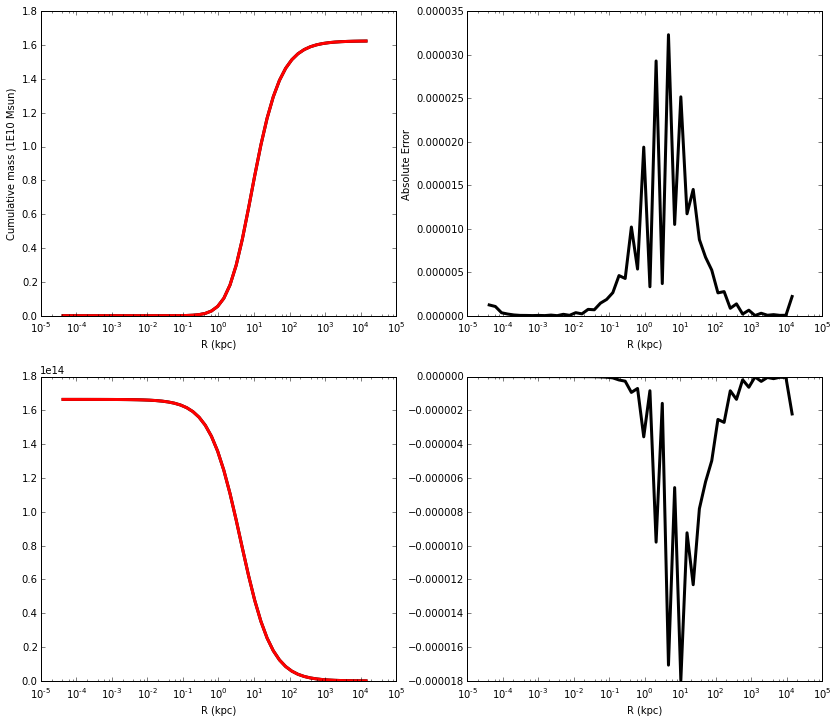

In [57]:
r = np.logspace(   np.log10(NFW.small_r*10),
                           np.log10(NFW.large_r),
                       50)

# plot exact and interpolated cumulative mass profiles:
fig, ax = plt.subplots(2,2)

exact_mass  = NFW.cumulative_mass(r)
interp_mass = opt_NFW._interpolate_cumulative_mass(r)

ax[(0,0)].plot(r / cgs.kpc, exact_mass / (1.0E10*cgs.Msun), color = 'black', lw = 3, label = 'Exact')
ax[(0,0)].plot(r / cgs.kpc, interp_mass / (1.0E10*cgs.Msun), color = 'red', lw = 3, label = 'Interpolated')

error = np.abs(interp_mass - exact_mass)/exact_mass
ax[(0,1)].plot(r/cgs.kpc, error, color = 'black', lw = 3, ls = '-')

# do the same for the potential
exact_potential  = NFW.potential(r)
interp_potential = opt_NFW.potential(r)

ax[(1,0)].plot(r / cgs.kpc, -exact_potential, color = 'black', lw = 3, label = 'Exact')
ax[(1,0)].plot(r / cgs.kpc, -interp_potential, color = 'red', lw = 3, label = 'Interpolated')

error = np.abs(interp_potential - exact_potential)/exact_potential
ax[(1,1)].plot(r/cgs.kpc, error, color = 'black', lw = 3, ls = '-')

# labels
for a in [(0,0),(1,0),(1,1),(0,1)]:
    ax[a].set_xlabel('R (kpc)')
    
    ax[a].semilogx()

ax[(0,0)].set_ylabel('Cumulative mass (1E10 Msun)')
ax[(0,1)].set_ylabel('Absolute Error')

fig.set_size_inches(14,12)

## Semi-organized plots containing comparisons between the analytical and numerical profiles

In [58]:
#
# This cell loads the tabulated DF's and the computed particle distributions 
#
analytic      = np.genfromtxt('hernquist.dat', names=True)


analytic_particle_file = '1m_analytic_hernquist_vrestrict.dat'
#particle_file          = '2m_numerical_hernquist.dat' # THIS ONE WORKS
particle_file = '1m_numerical_hernquist_vrestrict.dat'

# load the analytic DF
NFW_DF = df.DF(NFW)
f      = NFW_DF.load_df('hernquist.dat')

# load the pd computed from the analytic DF
NFW_PD = pd.particle_distribution(NFW_DF, 2.0E6, optimize=False)
NFW_PD.load_particle_ic(analytic_particle_file)

# load the numerical DF
DF_num = df.DF(NFW)
num_f  = DF_num.load_df('numerical_hernquist.dat')

# load the pd computed from the numerical DF
PD_num_f = pd.particle_distribution(DF_num, 2.0E6, optimize=False)
PD_num_f.load_particle_ic(particle_file)

# load the numerical optimized DF 
DF_num_opt = df.DF(NFW)
num_f_opt  = DF_num_opt.load_df('numerical_hernquist_optimized_2.dat')

# load the pd computed from the numerical DF
PD_num_f_opt = pd.particle_distribution(DF_num_opt, 2.0E6, optimize=False)
PD_num_f_opt.load_particle_ic(particle_file)



[DF] :  1000 DF points successfuly loaded from hernquist.dat
[Particle Distribution]:  Optimization turned off. Will run VERY SLOW, even if parallelized
[Particle Distribution]:  loaded 1000000 particles from 1m_analytic_hernquist_vrestrict.dat
[DF] :  1100 DF points successfuly loaded from numerical_hernquist.dat
[Particle Distribution]:  Optimization turned off. Will run VERY SLOW, even if parallelized
[Particle Distribution]:  loaded 1000000 particles from 1m_numerical_hernquist_vrestrict.dat
[DF] :  1100 DF points successfuly loaded from numerical_hernquist_optimized_2.dat
[Particle Distribution]:  Optimization turned off. Will run VERY SLOW, even if parallelized
[Particle Distribution]:  loaded 1000000 particles from 1m_numerical_hernquist_vrestrict.dat


### Distribution Function

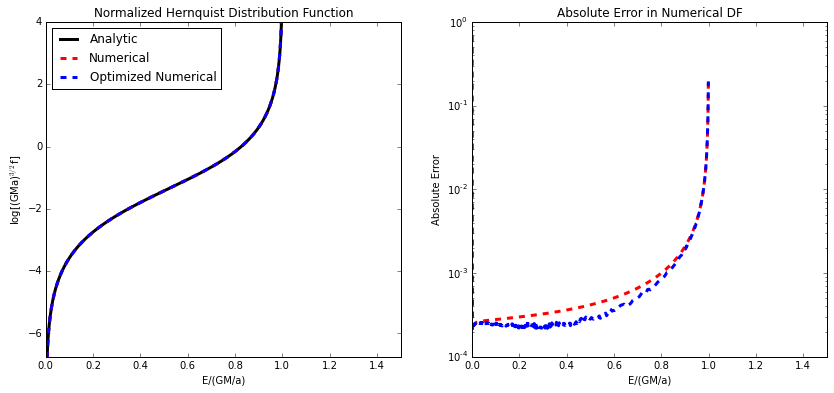

In [59]:

E_norm = (cgs.G * NFW.M_sys) / NFW.r_s
f_norm = (cgs.G * NFW.M_sys * NFW.r_s)**(3.0/2.0)

#numerical_f = DF_num.interpolate_f(analytic['E'])
E_vals      = DF_num.E
E_vals_opt  = DF_num_opt.E

numerical_f = DF_num.f
numerical_f_opt = DF_num_opt.f
analytic_f  = df.hernquist_df(E_vals, DF_num.dprof.M_sys, DF_num.dprof.r_s)
analytic_f_opt  = df.hernquist_df(E_vals_opt, DF_num.dprof.M_sys, DF_num.dprof.r_s)



fig, ax = plt.subplots(1,2)


ax[0].plot(E_vals / E_norm, np.log10(analytic_f  * f_norm), lw = 3, color = 'black', ls = '-', label = "Analytic")
ax[0].plot(E_vals / E_norm, np.log10(numerical_f * f_norm), lw = 3, color = 'red', ls = '--', label = 'Numerical')
ax[0].plot(E_vals_opt / E_norm, np.log10(numerical_f_opt * f_norm), lw = 3, color = 'blue', ls = '--', label = 'Optimized Numerical')



error = (np.abs(analytic_f - numerical_f)/analytic_f)
ax[1].plot(E_vals/E_norm, error, lw = 3 , color = 'red', ls ='--')
error = (np.abs(analytic_f_opt - numerical_f_opt)/analytic_f_opt)
ax[1].plot(E_vals_opt/E_norm, error, lw = 3 , color = 'blue', ls ='--')
#print (analytic_f - numerical_f)/analytic_f

ax[0].set_ylim(-6.75, 4)
ax[0].set_xlim(0.0,1.5)
ax[1].set_xlim(0.0,1.5)

ax[0].set_ylabel(r"log[(GMa)$^{3/2}$f]")
ax[0].set_xlabel(r'E/(GM/a)')
ax[0].set_title("Normalized Hernquist Distribution Function")
ax[0].legend(loc='best')

ax[1].set_ylabel('Absolute Error')
ax[1].set_xlabel(r'E/(GM/a)')
ax[1].set_title('Absolute Error in Numerical DF')
ax[1].semilogy()

fig.set_size_inches(14,6)
fig.savefig('hernquist_DF.png')

### Density vs. Particle Density

In [60]:
#PD_num_fum_f

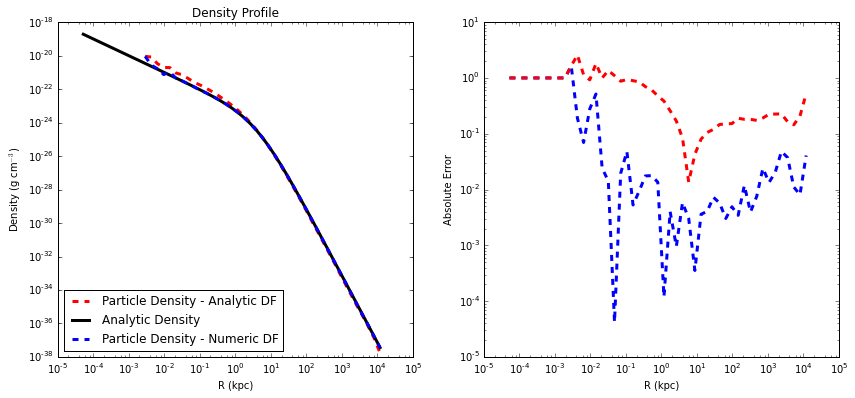

In [61]:
# Eventually should show
# 1) Analytic density
# 2) Particle Density from analytic DF
# 3) Particle Density from numerical DF


rbins = np.logspace(   np.log10(NFW_PD.DF.dprof.small_r*10),
                       np.log10(NFW_PD.DF.dprof.large_r),
                       50)

r_cent, pd_density = NFW_PD.density_profile(r_bins = rbins)
analytic_density   = NFW_PD.DF.dprof.density(r_cent)
r_cent, pd_num_density  = PD_num_f.density_profile(r_bins = rbins)



fig, ax = plt.subplots(1,2)

ax[0].plot(r_cent/cgs.kpc, pd_density, color = 'red' , ls ='--', lw=3, label = 'Particle Density - Analytic DF')
ax[0].plot(r_cent/cgs.kpc, analytic_density, color = 'black', ls='-', lw =3 , label='Analytic Density')
ax[0].plot(r_cent/cgs.kpc, pd_num_density, color = 'blue' , ls ='--', lw=3, label = 'Particle Density - Numeric DF')


ax[1].plot(r_cent/cgs.kpc, np.abs(analytic_density-pd_num_density)/analytic_density, color = 'blue' , ls ='--', lw=3, label = 'Numerical DF')
ax[1].plot(r_cent/cgs.kpc, np.abs(analytic_density-pd_density)/analytic_density, color = 'red' , ls ='--', lw=3, label = 'Analytic DF')



ax[0].semilogy()
ax[0].semilogx()
ax[0].legend(loc='best')

ax[1].semilogx()
ax[1].semilogy()

ax[0].set_xlabel('R (kpc)')
ax[0].set_ylabel(r'Density (g cm$^{-3}$)')
ax[0].set_title('Density Profile')

ax[1].set_xlabel('R (kpc)')
ax[1].set_ylabel(r'Absolute Error')

fig.set_size_inches(14,6)
fig.savefig('hernquist_density.png')

### Mass vs. Particle Mass


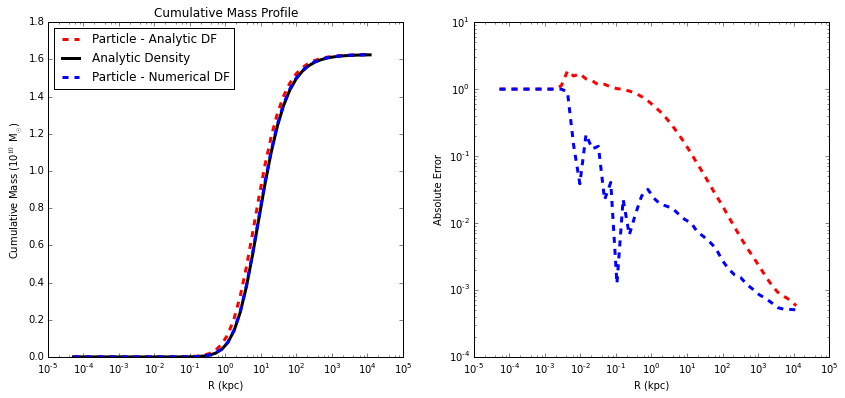

In [62]:
# Eventually should show
# 1) Analytic Mass
# 2) Particle Mass from analytic DF
# 3) Particle Mass from numerical DF

pd_mass = NFW_PD.cumulative_mass_profile(r_cent)
analytic_mass   = NFW_PD.DF.dprof.cumulative_mass(r_cent)
pd_num_mass  = PD_num_f.cumulative_mass_profile(r_cent)


norm = 1.0E10*cgs.Msun


fig, ax = plt.subplots(1,2)



ax[0].plot(r_cent/cgs.kpc, pd_mass/norm, color = 'red' , ls ='--', lw=3, label = 'Particle - Analytic DF')
ax[0].plot(r_cent/cgs.kpc, analytic_mass/norm, color = 'black', ls='-', lw =3 , label='Analytic Density')
ax[0].plot(r_cent/cgs.kpc, pd_num_mass/norm, color = 'blue' , ls ='--', lw=3, label = 'Particle - Numerical DF')



#ax[1].plot(r_cent/cgs.kpc, analytic_mass/analytic_mass- 1, color = 'black', ls='-', lw =3 , label='Analytic Density')
ax[1].plot(r_cent/cgs.kpc, np.abs(analytic_mass - pd_mass)/analytic_mass, color = 'red' , ls ='--', lw=3, label = 'Analytic DF')
ax[1].plot(r_cent/cgs.kpc, np.abs(analytic_mass - pd_num_mass)/analytic_mass, color = 'blue' , ls ='--', lw=3, label = 'Numerical DF')


ax[0].semilogx()

ax[0].set_xlabel('R (kpc)')
ax[0].set_ylabel(r'Cumulative Mass (10$^{10}$ M$_{\odot}$)')

ax[0].set_title('Cumulative Mass Profile')
ax[1].set_ylabel('Absolute Error')
ax[1].set_xlabel('R (kpc)')
ax[1].semilogx()
ax[1].semilogy()


ax[0].legend(loc='best')


fig.set_size_inches(14,6)
fig.savefig('hernquist_mass.png')

### Velocity Distribution

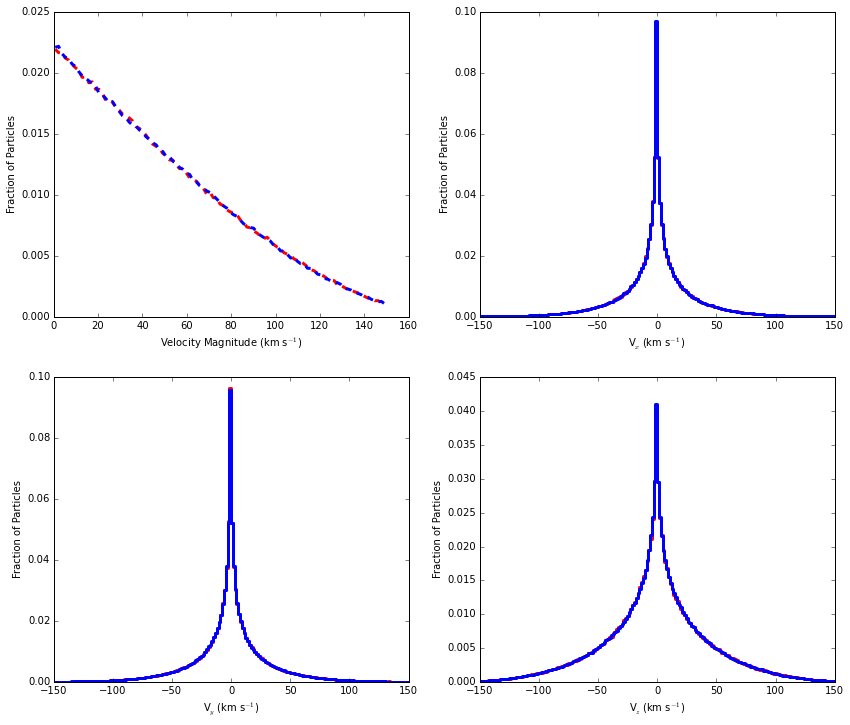

In [63]:
vr_bins = np.linspace(0.0, 150.0, 100.0) * cgs.km

vr, vr_hist = NFW_PD.vr_hist(vr_bins = vr_bins)
vr, vr_hist_numerical = PD_num_f.vr_hist(vr_bins = vr_bins)

fig, ax = plt.subplots(2,2)

# normalize by the number of particles

ax[(0,0)].plot(vr / cgs.km, vr_hist / (1.0*np.sum(vr_hist)), color = 'red', lw = 3 , ls = '--', label = 'Analytic DF')
ax[(0,0)].plot(vr / cgs.km, vr_hist_numerical / (1.0*np.sum(vr_hist)), color = 'blue', lw = 3, ls = '--', label = 'Numerical DF')

# plot vx vy and vz
v_bins = np.linspace(-150.0, 150.0, 200.0) * cgs.km
v_cent = 0.5 * (v_bins[1:] + v_bins[:-1])

anal_vx, v_bins = np.histogram(NFW_PD.vel[:,0], bins = v_bins)
num_vx , v_bins = np.histogram(PD_num_f.vel[:,0], bins = v_bins)

ax[(0,1)].step(v_cent / cgs.km, anal_vx / (1.0*np.sum(anal_vx)), color = 'red', lw = 3, ls = '-')
ax[(0,1)].step(v_cent / cgs.km, num_vx / (1.0*np.sum(anal_vx)), color = 'blue', lw = 3, ls = '-')

anal_vy, v_bins = np.histogram(NFW_PD.vel[:,1], bins = v_bins)
num_vy, v_bins = np.histogram(PD_num_f.vel[:,1], bins = v_bins)

ax[(1,0)].step(v_cent / cgs.km, anal_vy / (1.0*np.sum(anal_vy)), color = 'red', lw = 3, ls = '-')
ax[(1,0)].step(v_cent / cgs.km, num_vy / (1.0*np.sum(anal_vy)), color = 'blue', lw = 3, ls = '-')

anal_vz, v_bins = np.histogram(NFW_PD.vel[:,2], bins = v_bins)
num_vz , v_bins = np.histogram(PD_num_f.vel[:,2], bins = v_bins)

ax[(1,1)].step(v_cent / cgs.km, anal_vz / (1.0*np.sum(anal_vz)), color = 'red', lw = 3, ls = '-')
ax[(1,1)].step(v_cent / cgs.km, num_vz / (1.0*np.sum(anal_vz)), color = 'blue', lw = 3, ls = '-')


for a in [(0,0),(0,1),(1,1),(1,0)]:
    ax[a].set_ylabel('Fraction of Particles')

ax[(0,0)].set_xlabel(r'Velocity Magnitude (km s$^{-1}$)')    
ax[(0,1)].set_xlabel(r'V$_{x}$ (km s$^{-1}$)')
ax[(1,0)].set_xlabel(r'V$_{y}$ (km s$^{-1}$)')
ax[(1,1)].set_xlabel(r'V$_{z}$ (km s$^{-1}$)')

fig.set_size_inches(14,12)

997294 997220 995546
3038755.90898 3045270.0136 4306363.34727
3649292.74716
5.06630510053e+23 5.04330718146e+23 4.94451155823e+23
3649292.74716


/home/emerick/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:15: RuntimeWarning: invalid value encountered in divide


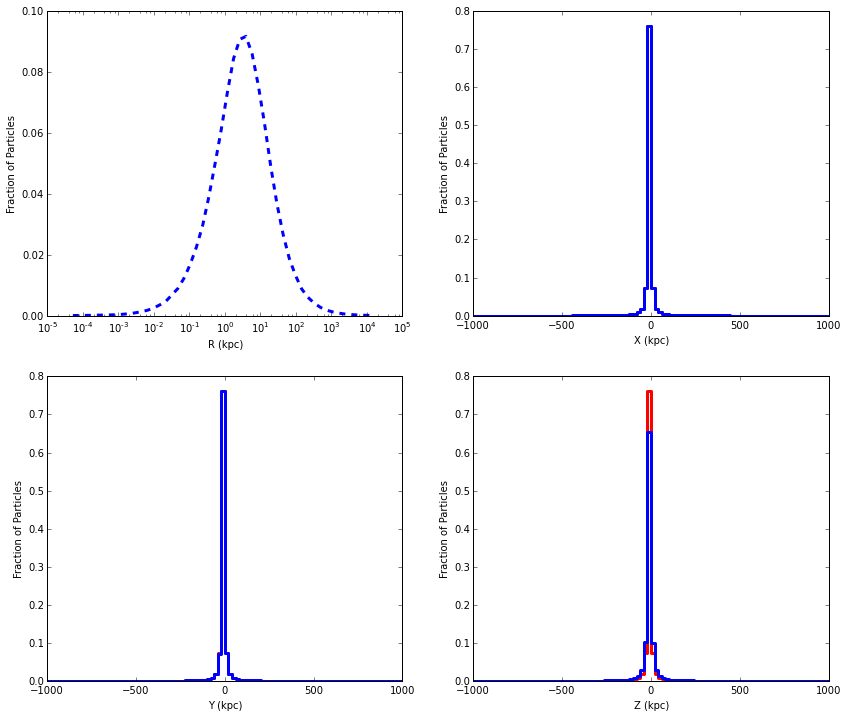

In [65]:
r_bins = np.logspace(   np.log10(NFW_PD.DF.dprof.small_r*10),
                       np.log10(NFW_PD.DF.dprof.large_r),
                       50)

r_cent = 0.5 * (r_bins[1:] + r_bins[:-1])


r_hist, r_bins = np.histogram(NFW_PD.r, bins = r_bins)
r_hist_numerical, r_bins = np.histogram(PD_num_f.pos[:,0], bins = r_bins)

fig, ax = plt.subplots(2,2)

# normalize by the number of particles

ax[(0,0)].plot(r_cent / cgs.kpc, r_hist / (1.0*np.sum(r_hist)), color = 'red', lw = 3 , ls = '--', label = 'Analytic DF')
ax[(0,0)].plot(r_cent / cgs.kpc, r_hist_numerical / (1.0*np.sum(r_hist_numerical)), color = 'blue', lw = 3, ls = '--', label = 'Numerical DF')

# plot vx vy and vz
r_bins = np.linspace(-1000, 1000, 100)*cgs.kpc

r_cent = 0.5 * (r_bins[1:] + r_bins[:-1])
anal_x, r_bins = np.histogram(NFW_PD.pos[:,0], bins = r_bins)
num_x , r_bins = np.histogram(PD_num_f.pos[:,0], bins = r_bins)

ax[(0,1)].step(r_cent / cgs.kpc, anal_x / (1.0*np.sum(anal_x)), color = 'red', lw = 3, ls = '-')
ax[(0,1)].step(r_cent / cgs.kpc, num_x / (1.0*np.sum(num_x)), color = 'blue', lw = 3, ls = '-')

anal_y, r_bins = np.histogram(NFW_PD.pos[:,1], bins = r_bins)
num_y, r_bins = np.histogram(PD_num_f.pos[:,1], bins = r_bins)

ax[(1,0)].step(r_cent / cgs.kpc, anal_y / (1.0*np.sum(anal_y)), color = 'red', lw = 3, ls = '-')
ax[(1,0)].step(r_cent / cgs.kpc, num_y / (1.0*np.sum(num_y)), color = 'blue', lw = 3, ls = '-')

anal_z, r_bins = np.histogram(NFW_PD.pos[:,2], bins = r_bins)
num_z , r_bins = np.histogram(PD_num_f.pos[:,2], bins = r_bins)

ax[(1,1)].step(r_cent / cgs.kpc, anal_z / (1.0*np.sum(anal_z)), color = 'red', lw = 3, ls = '-')
ax[(1,1)].step(r_cent / cgs.kpc, num_z / (1.0*np.sum(num_z)), color = 'blue', lw = 3, ls = '-')


for a in [(0,0),(0,1),(1,1),(1,0)]:
    ax[a].set_ylabel('Fraction of Particles')

ax[(0,0)].semilogx()

ax[(0,0)].set_xlabel(r'R (kpc)')    
ax[(0,1)].set_xlabel(r'X (kpc)')
ax[(1,0)].set_xlabel(r'Y (kpc)')
ax[(1,1)].set_xlabel(r'Z (kpc)')

fig.set_size_inches(14,12)

print np.sum(num_x), np.sum(num_y), np.sum(num_z)


print np.std(NFW_PD.vel[:,0]), np.std(NFW_PD.vel[:,1]), np.std(NFW_PD.vel[:,2])
print np.std(NFW_PD.vr())

print np.std(NFW_PD.pos[:,0]), np.std(NFW_PD.pos[:,1]), np.std(NFW_PD.pos[:,2])
print np.std(NFW_PD.vr())

0.576619602848 0.576371598748 0.57899950066
-0.00106930702677 -0.00644988592289 -0.00473788540723
0.000591357313347 -0.0119545614939 -0.0028006446783
0.705392354306


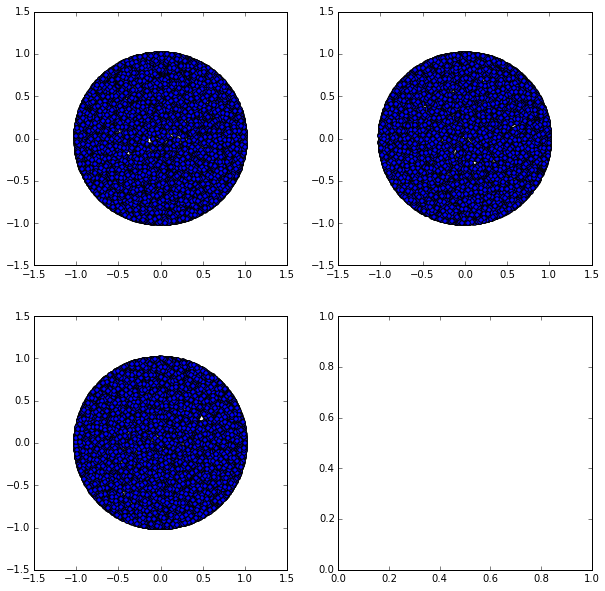

In [85]:
r = 1
n = 10000
#theta = np.random.rand(n) * np.pi
phi   = np.random.rand(n) * 2.0 * np.pi

theta = np.arccos(np.random.rand(n)*(2) - 1)

x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

fig, ax = plt.subplots(2,2)

ax[(0,0)].scatter(x,z)
ax[(0,1)].scatter(y,z)
ax[(1,0)].scatter(x,y)

fig.set_size_inches(10,10)
print np.std(x), np.std(y), np.std(z)
print np.average(x), np.average(y), np.average(z)
print np.median(x), np.median(y), np.median(z)

print np.std(np.sin(np.random.rand(10000)*2.0*np.pi))